# Applications of matrices and vectors

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

Some matrices and pictures.

A = 
 [[0.1 0.2 0.3]
 [0.4 0.5 0.6]
 [0.7 0.8 0.9]]

Picture defined by A


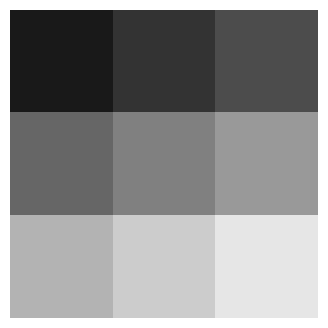

In [5]:
A = (np.arange(9)*0.1+0.1).reshape(3,3)
print("A = \n",A)
print("\nPicture defined by A")
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.imshow(np.round(A,1),cmap='gray',vmin=0,vmax=1)
ax.axis("off")
plt.show()

Some rank-one matrices and pictures.

A = 
 [[0.   0.25 0.5  0.75]
 [0.   0.25 0.5  0.75]
 [0.   0.25 0.5  0.75]
 [0.   0.25 0.5  0.75]]

rank(A) =  1

Picture defined by A


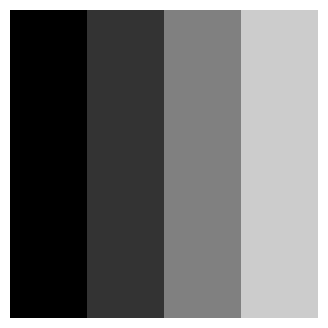

In [8]:
A = np.outer(np.ones(4),np.arange(0,1,0.25))
print("A = \n",A)
print("\nrank(A) = ",np.linalg.matrix_rank(A))
print("\nPicture defined by A")
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.imshow(np.round(A,1),cmap='gray',vmin=0,vmax=1)
ax.axis("off")
plt.show()

A = 
 [[0.25 0.2  0.15 0.1  0.05]
 [0.5  0.4  0.3  0.2  0.1 ]
 [0.75 0.6  0.45 0.3  0.15]
 [1.   0.8  0.6  0.4  0.2 ]]

rank(A) =  1

Picture defined by A


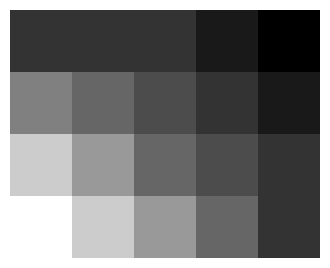

In [10]:
v = np.array([0.25,0.5,0.75,1])
w = np.array([1,0.8,0.6,0.4,0.2])
A = np.outer(v,w)
print("A = \n",A)
print("\nrank(A) = ",np.linalg.matrix_rank(A))
print("\nPicture defined by A")
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.imshow(np.round(A,1),cmap='gray',vmin=0,vmax=1)
ax.axis("off")
plt.show()

Computation of singular value decomposition

In [13]:
A = np.random.randn(4,5)
U,D,VT = np.linalg.svd(A)

Sanity check

In [16]:
print("A = \n", A)
print("\nUDVT = \n",U@np.diag(D)@VT[:4,:])
print("\nNorm of the difference = ",np.linalg.norm(A-U@np.diag(D)@VT[:4,:]) )

A = 
 [[ 0.57177513  2.15595702 -2.76387561 -0.74111741 -0.29426348]
 [-2.34363257  1.10678622 -1.47450933  1.12486044 -0.72182451]
 [-1.40399292 -0.53507729  0.43139923  0.25375363 -2.61788559]
 [ 0.02258044 -0.27302388 -0.37008729 -0.03955866 -0.90154331]]

UDVT = 
 [[ 0.57177513  2.15595702 -2.76387561 -0.74111741 -0.29426348]
 [-2.34363257  1.10678622 -1.47450933  1.12486044 -0.72182451]
 [-1.40399292 -0.53507729  0.43139923  0.25375363 -2.61788559]
 [ 0.02258044 -0.27302388 -0.37008729 -0.03955866 -0.90154331]]

Norm of the difference =  4.676104075734763e-15


### Image compression

Use the astronaut image below is sourced from `skimage`.

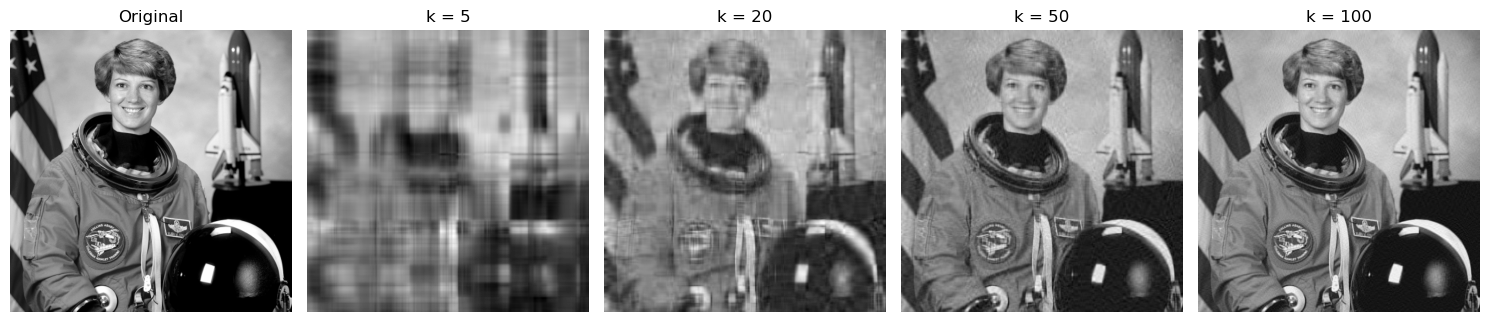

In [19]:
from skimage import data
from skimage.color import rgb2gray
from skimage.util import img_as_float

# Load example image and convert to grayscale float matrix
original = img_as_float(rgb2gray(data.astronaut()))

# Compute SVD
U, S, VT = np.linalg.svd(original, full_matrices=False)

# Reconstruct image with only top-k singular values
def svd_compress(U, S, VT, k):
    return U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]

# Try several values of k
ks = [5, 20, 50, 100]
fig, axs = plt.subplots(1, len(ks)+1, figsize=(15, 5))
axs[0].imshow(original, cmap='gray')
axs[0].set_title("Original")
axs[0].axis('off')

for i, k in enumerate(ks):
    compressed = svd_compress(U, S, VT, k)
    axs[i+1].imshow(compressed, cmap='gray')
    axs[i+1].set_title(f"k = {k}")
    axs[i+1].axis('off')

plt.tight_layout()
plt.show()


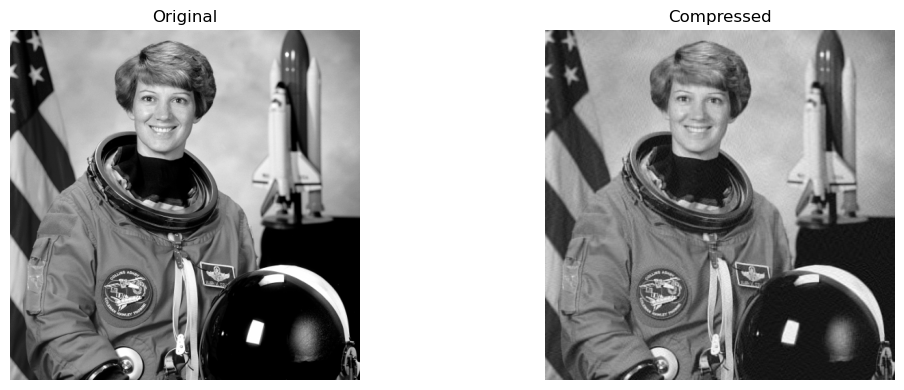

In [21]:
# Try a particular value of k
k = 100
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].imshow(original, cmap='gray')
axs[0].set_title("Original")
axs[0].axis('off')
compressed = svd_compress(U, S, VT, k)
axs[1].imshow(compressed, cmap='gray')
axs[1].set_title("Compressed")
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [23]:
print("shape of original picture = ",original.shape)
print("rank of original matrix = ",np.linalg.matrix_rank(original))
print("rank of compressed matrix = ",np.linalg.matrix_rank(compressed))
print("\nNorm of original = ",np.linalg.norm(original) )
print("\nNorm of the difference = ",np.linalg.norm(original-compressed) )

shape of original picture =  (512, 512)
rank of original matrix =  512
rank of compressed matrix =  100

Norm of original =  272.2192301056386

Norm of the difference =  11.614075399314638


## Networks



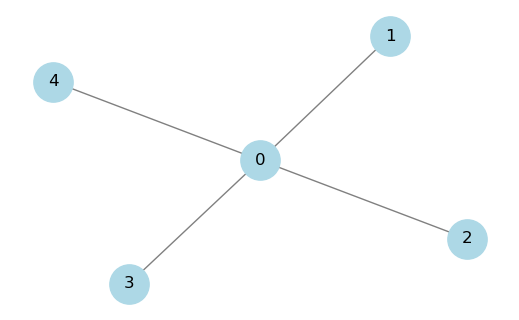

In [28]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define an adjacency matrix (undirected graph)
# Example: 4 nodes, edges: 0-1, 1-2, 2-3
adj_triangle = np.array([
    [0, 1, 1,],
    [1, 0, 1],
    [1, 1, 0]
])

adj_path = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0]
])

adj_star = np.array([
    [0, 1, 1, 1,1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
])

adj_cycle = np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0]
])

# Create the graph from the adjacency matrix
#G = nx.from_numpy_array(adj_path)
#G = nx.from_numpy_array(adj_triangle)
G = nx.from_numpy_array(adj_star)
#G = nx.from_numpy_array(adj_cycle)


# Draw the graph
plt.figure(figsize=(5,3))
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800)
plt.show()


A graph with two connected components.

[[0 1 1 1 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 0 1 0]]


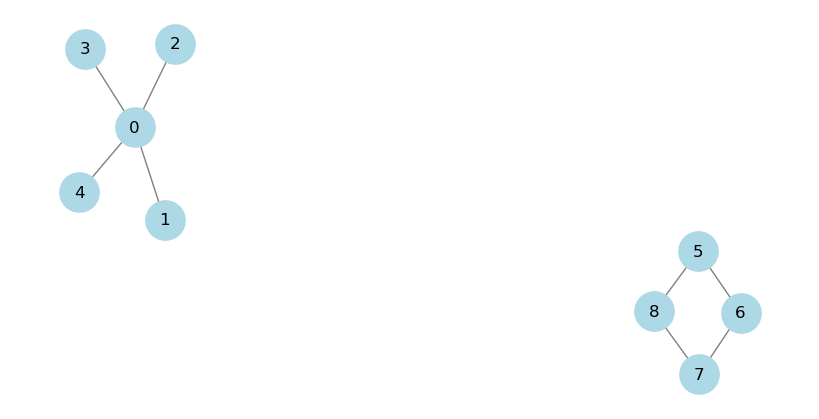

In [30]:
from scipy.linalg import block_diag
two_comp = block_diag(adj_star,adj_cycle)
print(two_comp)
G = nx.from_numpy_array(two_comp)
pos = nx.spring_layout(G)  # Layout for visualization
plt.figure(figsize=(8,4))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800)
plt.show()

Compute some Laplacians and their eigendecomposition.

In [33]:
L_star = np.diag(np.sum(adj_star,axis=0)) - adj_star
L_cycle = np.diag(np.sum(adj_cycle,axis=0)) - adj_cycle
L_two_comp = block_diag(L_star,L_cycle)
print("L_star =\n",L_star)
print("\nL_cycle =\n",L_cycle)
print("\nL_two_comp =\n",L_two_comp)

L_star =
 [[ 4 -1 -1 -1 -1]
 [-1  1  0  0  0]
 [-1  0  1  0  0]
 [-1  0  0  1  0]
 [-1  0  0  0  1]]

L_cycle =
 [[ 2 -1  0 -1]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [-1  0 -1  2]]

L_two_comp =
 [[ 4 -1 -1 -1 -1  0  0  0  0]
 [-1  1  0  0  0  0  0  0  0]
 [-1  0  1  0  0  0  0  0  0]
 [-1  0  0  1  0  0  0  0  0]
 [-1  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  2 -1  0 -1]
 [ 0  0  0  0  0 -1  2 -1  0]
 [ 0  0  0  0  0  0 -1  2 -1]
 [ 0  0  0  0  0 -1  0 -1  2]]


In [35]:
w,v = np.linalg.eigh(L_star)
w

array([0., 1., 1., 1., 5.])

In [37]:
w,v = np.linalg.eigh(L_two_comp)
w

array([-8.39460016e-16,  0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  2.00000000e+00,  2.00000000e+00,  4.00000000e+00,
        5.00000000e+00])

Create and draw a bipartite graph.
First create the adjacency matrix.

In [40]:
from scipy.linalg import block_diag
m = 3
n = 4
edges = np.ones((m,n))
adj_bipartite = np.zeros((m+n,m+n))
adj_bipartite[:m,m:] = edges
adj_bipartite[m:,:m] = edges.T
adj_bipartite

array([[0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.]])

Now draw the graph.  First, draw it by placing the vertices randomly.

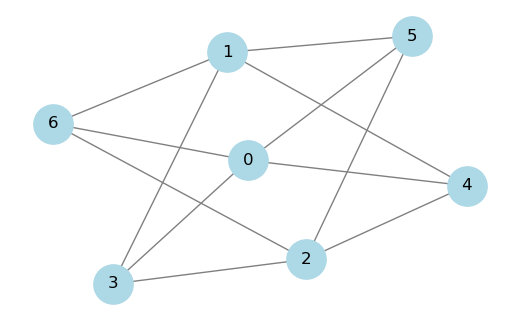

In [43]:
G = nx.from_numpy_array(adj_bipartite)
pos = nx.spring_layout(G)  # Layout for visualization
plt.figure(figsize=(5,3))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800)
plt.show()

Now specify the positions to make it evident that the graph is bipartite.

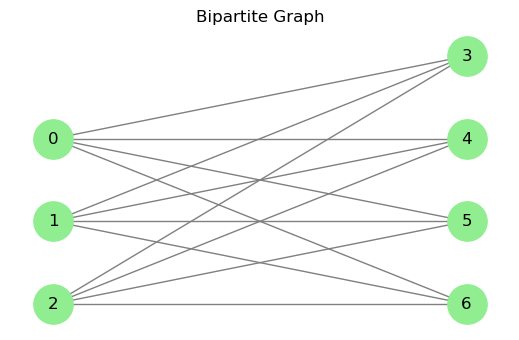

In [46]:
G = nx.from_numpy_array(adj_bipartite)
pos = {}
for i in range(m):
    pos[i] = (0, m - i - 1)  # Left column
for j in range(n):
    pos[m + j] = (1, n - j - 1)  # Right column
plt.figure(figsize=(5,3))

nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=800)
plt.title("Bipartite Graph")
plt.show()

## Quantum computation

Compute the eigendecomposition of the Pauli matrices.

In [49]:
X = np.array([[0,1],[1,0]])
v,w = np.linalg.eigh(X)
print("eigenvalues = ",v)
print("eigenvectors = \n",w)

eigenvalues =  [-1.  1.]
eigenvectors = 
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


In [51]:
Y = np.array([[0,-1j],[1j,0]])
v,w = np.linalg.eigh(Y)
print("eigenvalues = ",v)
print("eigenvectors = \n",w)

eigenvalues =  [-1.  1.]
eigenvectors = 
 [[-0.70710678+0.j         -0.70710678+0.j        ]
 [ 0.        +0.70710678j  0.        -0.70710678j]]


In [53]:
Z = np.array([[1,0],[0,-1]])
v,w = np.linalg.eigh(Z)
print("eigenvalues = ",v)
print("eigenvectors = \n",w)

eigenvalues =  [-1.  1.]
eigenvectors = 
 [[0. 1.]
 [1. 0.]]


In [55]:
H = np.array([[1,1],[1,-1]])/(2**0.5)
v,w = np.linalg.eigh(H)
print("eigenvalues = ",v)
print("eigenvectors = \n",w)

eigenvalues =  [-1.  1.]
eigenvectors = 
 [[ 0.38268343 -0.92387953]
 [-0.92387953 -0.38268343]]


## Data Science

        TV  Radio  Newspaper  Sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


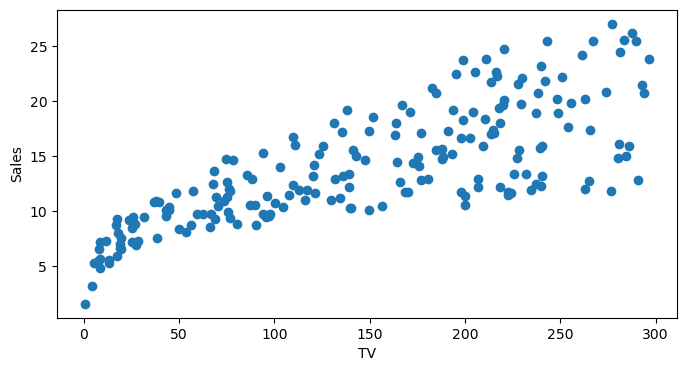

In [58]:
import pandas as pd
advertising = pd.read_csv('Advertising.csv',index_col=0)
print(advertising)
plt.figure(figsize=(8,4))
plt.scatter(advertising['TV'],advertising['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [60]:
import statsmodels.api as sm
pred = advertising['TV']
X = pred
target = advertising['Sales']
# Add a constant to the independent variable for the intercept term
pred = sm.add_constant(pred)

# Fit the linear regression model
regmodel = sm.OLS(target, pred).fit()

# Print the summary statistics
print(regmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.47e-42
Time:                        06:26:07   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

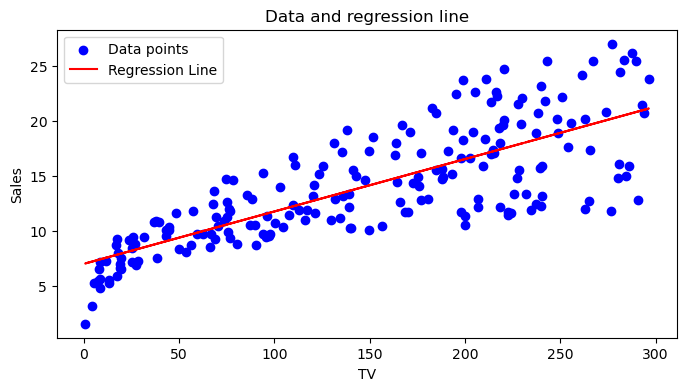

In [62]:
# Create new predictions for the regression line
hattarget = regmodel.predict(pred)

plt.figure(figsize=(8,4))
# Plot data points
plt.scatter(X, target, label='Data points', color='blue')
# Plot the regression line
plt.plot(X.values, hattarget.values, label='Regression Line', color='red')
# Adding labels and title
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Data and regression line')
plt.legend()
plt.show()




The regression coefficients (and all other numbers) are calculated by solving a least-squares problem.

In [65]:
X = pred.values
y = target.values
beta = np.linalg.solve(X.T@X,X.T@y)
beta

array([7.03259355, 0.04753664])

Repeat the analysis but including all predictors: `TV`,`Radio`,`Newspaper`

In [68]:
import statsmodels.api as sm
pred = advertising.iloc[:,:3]
target = advertising['Sales']
# Add a constant to the independent variable for the intercept term
pred = sm.add_constant(pred)

# Fit the linear regression model
modelstocks = sm.OLS(target, pred).fit()

# Print the summary statistics
print(modelstocks.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.58e-96
Time:                        06:26:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Again, the regression coefficients (and all other numbers) are calculated by solving a least-squares problem.

In [71]:
X = pred.values
y = target.values
beta = np.linalg.solve(X.T@X,X.T@y)
beta

array([ 2.93888937e+00,  4.57646455e-02,  1.88530017e-01, -1.03749304e-03])

In [73]:
np.round(beta,2)

array([ 2.94,  0.05,  0.19, -0.  ])